# Model Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')


## 1. Model Capacity

 - import Packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- pandas DataFrame 
    - 'Electric.csv' From github

In [3]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [4]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


- surface_area vs.electricity 산점도

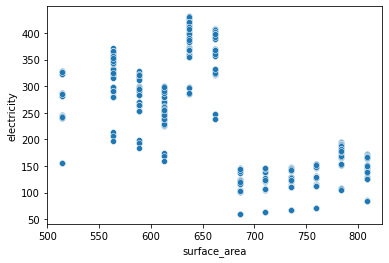

In [5]:
sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()

### 1) 1차 모델 시각화

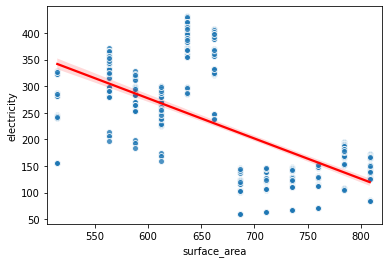

In [6]:
sns.regplot(x='surface_area', y = 'electricity', data=Elec, line_kws = {'color':'red'}, scatter_kws = {'edgecolor':'white'})
plt.xlim(505,820)
plt.show()

### 2) 2차 모델 시각화

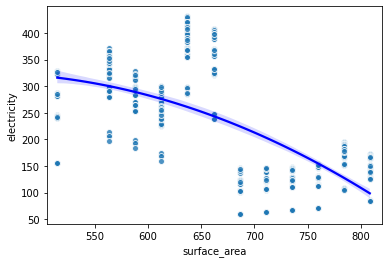

In [7]:
sns.regplot(x='surface_area',y='electricity', data=Elec, line_kws={'color':'blue'},scatter_kws={'edgecolor':'white'}, order=2)
plt.xlim(505,820)
plt.show()

### 3) 5차 모델 시각화

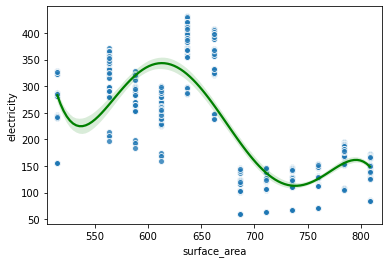

In [10]:
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'green'}, scatter_kws={'edgecolor':'white'}, order=5)
plt.xlim(505,820)
plt.show()

### 4) 9차 모델 시각화

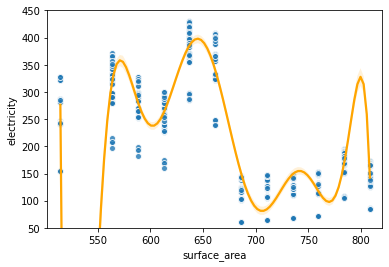

In [12]:
sns.regplot(x='surface_area',y='electricity',data=Elec, line_kws={'color':'orange'},scatter_kws={'edgecolor':'white'},order=9)
plt.xlim(502,820)
plt.ylim(50,450)
plt.show()

### 5) 4개 모델 비교 시각화

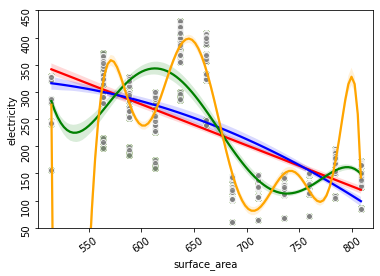

In [14]:
sns.regplot(x='surface_area',y='electricity',data=Elec, line_kws={'color':'red'})
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'blue'}, order=2)
sns.regplot(x='surface_area',y='electricity',data=Elec, line_kws={'color':'green'}, order=5)
sns.regplot(x='surface_area',y='electricity',data=Elec, line_kws={'color':'orange'}, scatter_kws={'color':'gray', 'edgecolor':'white'}, order=9)
plt.xlim(502,820)
plt.ylim(50,450)
plt.xticks(rotation=35)
plt.yticks(rotation=90)
plt.show()

## 2. Training Error


### 1) 1차 모델 Training Error
- X-train and Y-train

In [16]:
x_train = Elec[['surface_area']]
y_train = Elec['electricity']

x_train.shape, y_train.shape

((768, 1), (768,))

- 모델 생성

In [17]:
from sklearn.linear_model import LinearRegression

Model_1=LinearRegression()
Model_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 모델 정보(학습 결과)확인

In [18]:
print(Model_1.coef_)
print(Model_1.intercept_)

[-0.75387157]
729.4538243006992


- y_hat(예측값) 생성

In [19]:
y_hat_1=Model_1.predict(x_train)
len(y_hat_1)

768

- MSE(Mean Squared Error)계산


In [20]:
TR_Err_1 = np.mean((y_train - y_hat_1)**2)
TR_Err_1

5763.983779426347

### 2) 5차 모델 Training Error
- x 다항차수 변환
    - (768,1) to (768,5)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias = False)
PX_5 = poly.fit_transform(x_train)

In [22]:
PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [23]:
x_train.shape, y_train.shape

((768, 1), (768,))

- 5차 모델 생성

In [24]:
Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 학습 결과 확인

In [25]:
np.set_printoptions(suppress=True, precision=10)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


- y_hat(예측값) 생성

In [26]:
PX_5_pred = poly.fit_transform(x_train)
y_hat_5 = Model_5.predict(PX_5_pred)
y_hat_5.shape

(768,)

- MSE(mean squared error)계산

In [27]:
TR_Err_5 = np.mean((y_train-y_hat_5)**2)
TR_Err_5

4177.726328606075

### 3) 9차 모델 Training Error

In [28]:
# 다항차수로 변환

poly = PolynomialFeatures(degree = 9, include_bias=False)
PX_9 = poly.fit_transform(x_train)
x_train.shape, PX_9.shape

((768, 1), (768, 9))

In [29]:
# 모델 생성

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

# 학습결과(모델정보)확인

print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258373871365


In [30]:
# y_hat(예측값) 생성

PX_9_pred = poly.fit_transform(x_train)
y_hat_9 = Model_9.predict(PX_9_pred)
y_hat_9.shape

(768,)

In [31]:
# MSE 계산

TR_Err_9 = np.mean((y_train- y_hat_9)**2)
TR_Err_9

4086.7199908150374

### 3개 모델 Training Error 비교

In [32]:
print('1차모델', TR_Err_1)
print('5차모델', TR_Err_5)
print('9차모델', TR_Err_9)

1차모델 5763.983779426347
5차모델 4177.726328606075
9차모델 4086.7199908150374


### 잔차(Residual) 시각화

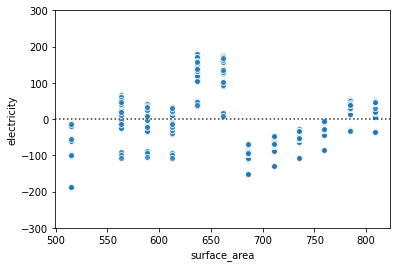

In [33]:
# 1차 모델

sns.residplot(x = 'surface_area',y='electricity', data =Elec, order = 1, scatter_kws={'edgecolor':'white'})
plt.ylim(-300,300)
plt.show()

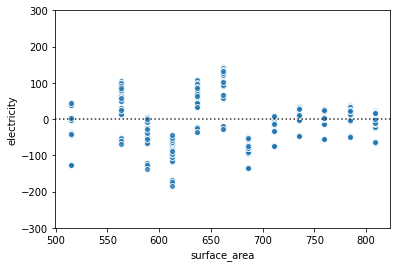

In [35]:
# 5차 모델
sns.residplot(x='surface_area',y='electricity',data=Elec, order=5, scatter_kws={'edgecolor':'white'})
plt.ylim(-300,300)
plt.show()

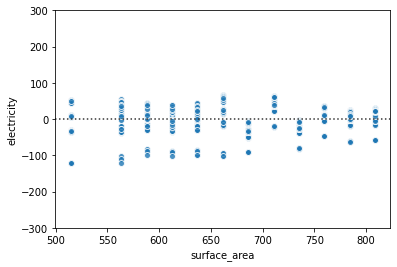

In [36]:
# 9차 모델
sns.residplot(x='surface_area',y='electricity',data=Elec, order=9, scatter_kws={'edgecolor':'white'})
plt.ylim(-300,300)
plt.show()

## Testing Error

### Train_Data vs. Test_Data


In [37]:
# (1) DataFrame Split ( 8:2 )

from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, test_size=0.2, random_state=2045)

In [38]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

In [39]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


In [40]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


In [41]:
# (2) Array Split

x_train, x_test, y_train, y_test = train_test_split(Elec[['surface_area']], Elec['electricity'], test_size = 0.2, random_state = 2045)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 1), (154, 1), (614,), (154,))

In [43]:
x_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


In [44]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

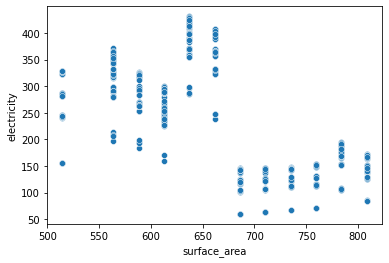

In [47]:
# (3) distribution Visualization
        # train data

sns.scatterplot(TR_Elec['surface_area'], TR_Elec['electricity'])
plt.show()

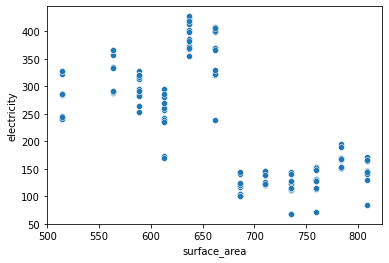

In [48]:
# test data

sns.scatterplot(TE_Elec['surface_area'], TE_Elec['electricity'])
plt.show()

### 1) 1차 모델 Testing Error

In [49]:
# train_data로 모델 생성

model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# test_data로 y_hat(예측값)생성

y_hat1 = model1.predict(x_test)
y_hat1.shape

(154,)

In [51]:
# test_data로 MSE 계산

from sklearn.metrics import mean_squared_error

TE_Err1 = mean_squared_error(y_test, y_hat1)
TE_Err1

6044.176547629271

### 2) 5차 모델 Testing Error


In [52]:
# training data로 모델 생성

poly = PolynomialFeatures(degree = 5, include_bias=False)
px5tr = poly.fit_transform(x_train)

model5=LinearRegression()
model5.fit(px5tr,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# test_data로 y_hat(예측값) 생성

px5te = poly.fit_transform(x_test)
y_hat5 = model5.predict(px5te)


In [54]:
# test_data로 MSE 계산

TE_Err5=mean_squared_error(y_test, y_hat5)
TE_Err5

4330.604566409499

### 3) 9차 모델 Testing Error


In [56]:
# train_data로 모델 생성

poly = PolynomialFeatures(degree=9, include_bias=False)
px9tr = poly.fit_transform(x_train  )

In [57]:
model9 = LinearRegression()
model9.fit(px9tr, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# test_data로 y_hat(예측값)생성

px9te=poly.fit_transform(x_test)
y_hat9 = model9.predict(px9te)


In [59]:
# test_data로 MSE 계산

TE_Err9=mean_squared_error(y_test,y_hat9)
TE_Err9

4238.689067137633

### 4) 3개 모델 Testing Error 비교

In [61]:
print('1차모델', TE_Err1)
print('5차모델', TE_Err5)
print('9차모델', TE_Err9)

1차모델 6044.176547629271
5차모델 4330.604566409499
9차모델 4238.689067137633


## 4. Validation Approach

### Train vs. Validation vs. Test ( 6:2:2 )

In [62]:
x_remain, x_test, y_remain, y_test = train_test_split(Elec[['surface_area']], Elec['electricity'], test_size=int(len(Elec)*0.2), random_state=2045)

print(x_remain.shape, y_remain.shape)
print(x_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


In [63]:
# train_data vs validation_data(6:2)
x_train, x_valid, y_train, y_valid = train_test_split(x_remain, y_remain, test_size = int(len(Elec)*0.2), random_state=2045)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


In [64]:
# 5차 모델 

poly = PolynomialFeatures(degree=5, include_bias=False)
px5tr = poly.fit_transform(x_train)

model5=LinearRegression()
model5.fit(px5tr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
px5vd=poly.fit_transform(x_valid)
y_hat5=model5.predict(px5vd)

In [67]:
mse5=mean_squared_error(y_valid, y_hat5)
mse5

4136.4312593408395

In [68]:
poly=PolynomialFeatures(degree=9, include_bias=False)
px9tr=poly.fit_transform(x_train)
model9=LinearRegression()
model9.fit(px9tr,y_train)
px9_valid=poly.fit_transform(x_valid)
y_hat9=model9.predict(px9_valid)
mse9=mean_squared_error(y_valid,y_hat9)
mse9

3955.9733124909912

In [69]:
print('mse5 :', mse5)
print('mse9 :', mse9)

mse5 : 4136.4312593408395
mse9 : 3955.9733124909912


In [71]:
px9te = poly.fit_transform(x_test)
mean_squared_error(y_test,model9.predict(px9te))

4220.88573210769